<a href="https://colab.research.google.com/github/kiet0807/CS114.L21/blob/main/NN_Clothes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten

import pandas as pd

In [77]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [78]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [79]:
fashion_mnist_labels = ["Áo thun",           # index 0
                        "Quần dài",          # index 1
                        "Áo liền quần",      # index 2 
                        "Đầm",               # index 3 
                        "Áo khoác",          # index 4
                        "Sandal",            # index 5
                        "Áo sơ mi",          # index 6 
                        "Giày",              # index 7 
                        "Túi xách",          # index 8 
                        "Ủng"]               # index 9

In [80]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_test[0].shape

(28, 28, 1)

In [81]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [82]:
model = tf.keras.Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [83]:
BATCH_SIZE=1000
EPOCHS = 100

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/100
48/48 [==============================] - 1s 17ms/step - loss: 0.8891 - accuracy: 0.7040 - val_loss: 0.5752 - val_accuracy: 0.8058
Epoch 2/100
48/48 [==============================] - 1s 15ms/step - loss: 0.5297 - accuracy: 0.8211 - val_loss: 0.4956 - val_accuracy: 0.8322
Epoch 3/100
48/48 [==============================] - 1s 15ms/step - loss: 0.4727 - accuracy: 0.8391 - val_loss: 0.4709 - val_accuracy: 0.8378
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 0.4381 - accuracy: 0.8519 - val_loss: 0.4368 - val_accuracy: 0.8497
Epoch 5/100
48/48 [==============================] - 1s 15ms/step - loss: 0.4147 - accuracy: 0.8583 - val_loss: 0.4287 - val_accuracy: 0.8521
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 0.4024 - accuracy: 0.8612 - val_loss: 0.4088 - val_accuracy: 0.8587
Epoch 7/100
48/48 [==============================] - 1s 14ms/step - loss: 0.3866 - accuracy: 0.8666 - val_loss: 0.4086 - val_accuracy: 0.8552
Epoch 

In [85]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=1000)
print("\nTrain Accuracy: " ,train_accuracy)
print("\nTrain Loss: " ,train_loss)

60/60 [==============================] - 0s 7ms/step - loss: 0.1675 - accuracy: 0.9456

Train Accuracy:  0.9455999732017517

Train Loss:  0.16746047139167786


In [86]:
test_loss, test_acc = model.evaluate(x_test,  y_test, batch_size = 1000)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

10/10 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8818

Test accuracy: 0.8817999958992004

Test loss: 0.3735972046852112


In [87]:
predictions = model.predict(x_test)

In [88]:
predictions[0]

array([6.4333426e-12, 2.8245006e-13, 2.2583233e-09, 3.6211565e-11,
       2.1020923e-09, 9.9072160e-05, 1.2556009e-07, 6.3729482e-03,
       7.9949075e-07, 9.9352705e-01], dtype=float32)

In [89]:
np.argmax(predictions[0])


9

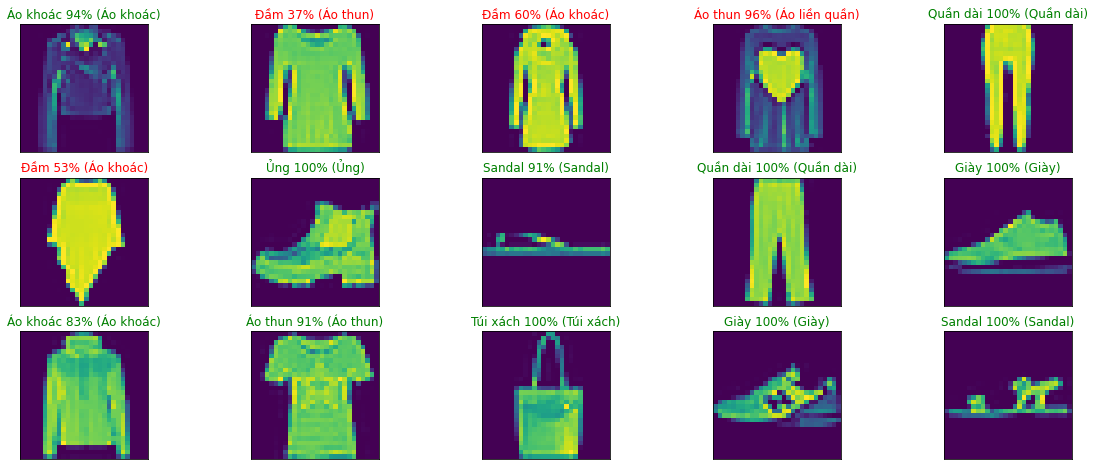

In [113]:

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(predictions[index])
    true_index = y_test[index]
    
    ax.set_title("{} {:2.0f}% ({})".format(fashion_mnist_labels[predict_index],
                                  100*np.max(predictions[index]), 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

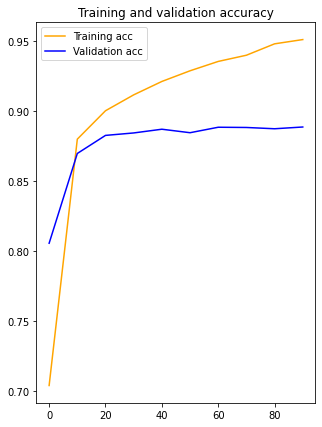

In [155]:
def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(acc, 'b', label='Training acc', color = 'orange')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

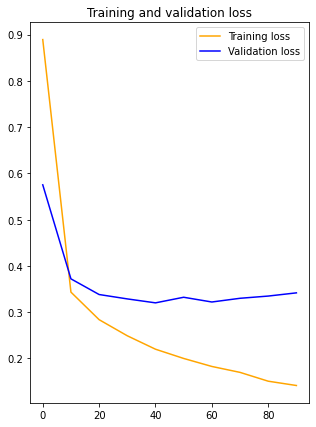

In [156]:
def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    every_sample =  int(epochs / samples)
    loss = pd.DataFrame(loss).iloc[::every_sample, :]
    val_loss = pd.DataFrame(val_loss).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(loss, 'b', label='Training loss', color = 'orange')
    ax.plot(val_loss, 'b', label='Validation loss')
    ax.set_title('Training and validation loss')
    ax.legend()

plot_history(history)